Epoch 1/100
835/835 - 3s - loss: 1.0212e-04 - mean_squared_error: 1.0212e-04 - val_loss: 5.1412e-05 - val_mean_squared_error: 5.1412e-05 - 3s/epoch - 3ms/step
Epoch 2/100
835/835 - 2s - loss: 4.3586e-05 - mean_squared_error: 4.3586e-05 - val_loss: 3.6571e-05 - val_mean_squared_error: 3.6571e-05 - 2s/epoch - 2ms/step
Epoch 3/100
835/835 - 2s - loss: 3.5566e-05 - mean_squared_error: 3.5566e-05 - val_loss: 3.3612e-05 - val_mean_squared_error: 3.3612e-05 - 2s/epoch - 2ms/step
Epoch 4/100
835/835 - 2s - loss: 3.1743e-05 - mean_squared_error: 3.1743e-05 - val_loss: 3.1345e-05 - val_mean_squared_error: 3.1345e-05 - 2s/epoch - 2ms/step
Epoch 5/100
835/835 - 2s - loss: 3.0964e-05 - mean_squared_error: 3.0964e-05 - val_loss: 4.3256e-05 - val_mean_squared_error: 4.3256e-05 - 2s/epoch - 2ms/step
Epoch 6/100
835/835 - 2s - loss: 2.7589e-05 - mean_squared_error: 2.7589e-05 - val_loss: 2.8218e-05 - val_mean_squared_error: 2.8218e-05 - 2s/epoch - 2ms/step
Epoch 7/100
835/835 - 2s - loss: 2.4975e-05 - 

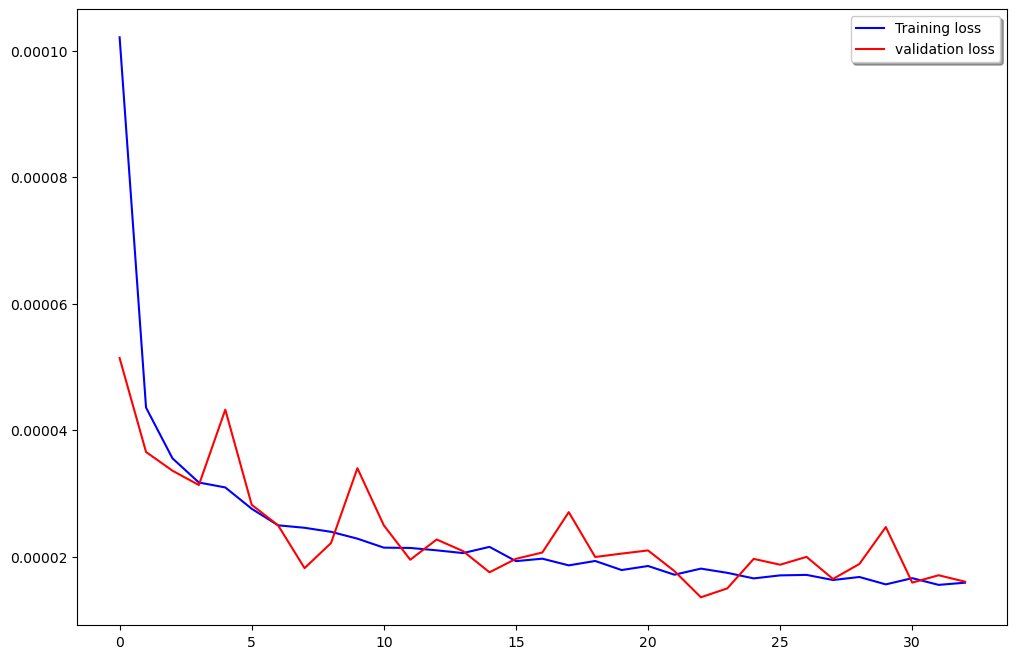

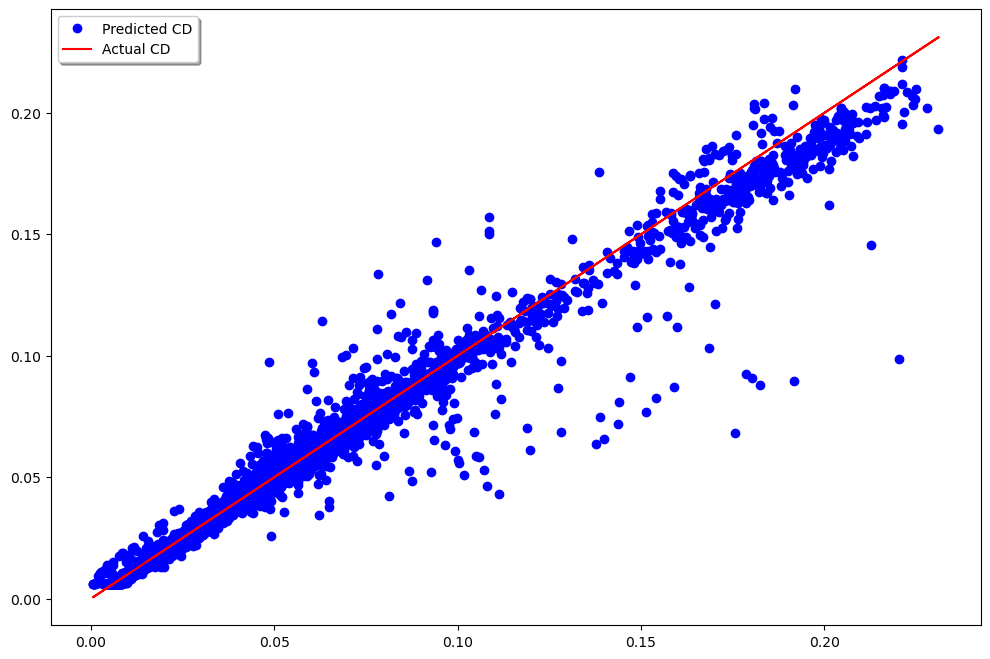

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

# Load dataset
x = np.loadtxt('x_matrix.txt')
CD = np.loadtxt('CD_matrix.txt')

# Normalize the data
x = x/np.amax(x, axis=0)


# Split the dataset into training, validation and test sets
x_train, x_test, CD_train, CD_test = train_test_split(x, CD, test_size=0.1, random_state=42)
x_train, x_val, CD_train, CD_val = train_test_split(x_train, CD_train, test_size=0.1, random_state=42)

# Create the model
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=5))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="linear"))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(x_train, CD_train, epochs=100, batch_size=256, validation_data=(x_val, CD_val), callbacks=[early_stopping], verbose=2)

# Evaluate the model
scores = model.evaluate(x_test, CD_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(history.history['loss'], color='b', label="Training loss")
ax.plot(history.history['val_loss'], color='r', label="validation loss",axes =ax)
legend = ax.legend(loc='best', shadow=True)

# Predict the CD
CD_pred = model.predict(x_test)

# Plot the predicted CD vs the actual CD
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(CD_test, CD_pred, 'o', color='b', label="Predicted CD")
ax.plot(CD_test, CD_test, '-', color='r', label="Actual CD")
legend = ax.legend(loc='best', shadow=True)

# Calculate the R2 score
r2 = r2_score(CD_test, CD_pred)
print("R2 score: ", r2)

# Calculate the mean squared error
mse = np.mean((CD_test - CD_pred)**2)
print("Mean squared error: ", mse)

# Save the model
model.save('MLP4regression.h5')